In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/turkey-political-opinions/datav2.csv
/kaggle/input/turkey-political-opinions/yonelimfinal.csv
/kaggle/input/turkey-political-opinions/data.csv


In [2]:
data = pd.read_csv("/kaggle/input/turkey-political-opinions/data.csv")
data1 = pd.read_csv("/kaggle/input/turkey-political-opinions/yonelimfinal.csv")
data2 = pd.read_csv("/kaggle/input/turkey-political-opinions/datav2.csv")

data = pd.concat([data, data1, data2], axis = 0)
data.drop(['Timestamp'],axis=1,inplace=True)

data.head()

,Cinsiyet,Yas,Bolge,Egitim,soru1,soru2,soru3,soru4,soru5,soru6,soru7,soru8,soru9,soru10,parti
0,Erkek,18-30,Marmara,Lisans,Hayır,Evet,Evet,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,IYI PARTI
1,Erkek,18-30,Marmara,Lisans,Evet,Evet,Hayır,Evet,Hayır,Evet,Hayır,Evet,Hayır,Hayır,AKP
2,Kadın,18-30,Marmara,Lisans,Hayır,Evet,Hayır,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,DIĞER
3,Erkek,0-18,Marmara,Lise,Evet,Evet,Hayır,Evet,Hayır,Evet,Evet,Evet,Evet,Evet,IYI PARTI
4,Erkek,18-30,Marmara,Ön Lisans,Hayır,Evet,Evet,Evet,Hayır,Hayır,Evet,Evet,Hayır,Hayır,IYI PARTI


In [3]:
data = data.rename(columns = {"soru1":"Ekonik_Durum_iyimi", "soru2":"Egitime_Reform", "soru3":"Ozellestirme",
                            "soru4":"Idam_olmalımı", "soru5": "HurBasın_Varmi", "soru6": "Alkol_Yasagı_olmalımı",
                            "soru7":"Laik_Devlet_Istek", "soru8":"Kurtaj_Yasagına_Destek", "soru9":"Ohal_ozgurlugu_kisitliyormu",
                            "soru10":"Yeni_Partilere_Destek"})
data.head()

,Cinsiyet,Yas,Bolge,Egitim,Ekonik_Durum_iyimi,Egitime_Reform,Ozellestirme,Idam_olmalımı,HurBasın_Varmi,Alkol_Yasagı_olmalımı,Laik_Devlet_Istek,Kurtaj_Yasagına_Destek,Ohal_ozgurlugu_kisitliyormu,Yeni_Partilere_Destek,parti
0,Erkek,18-30,Marmara,Lisans,Hayır,Evet,Evet,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,IYI PARTI
1,Erkek,18-30,Marmara,Lisans,Evet,Evet,Hayır,Evet,Hayır,Evet,Hayır,Evet,Hayır,Hayır,AKP
2,Kadın,18-30,Marmara,Lisans,Hayır,Evet,Hayır,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,DIĞER
3,Erkek,0-18,Marmara,Lise,Evet,Evet,Hayır,Evet,Hayır,Evet,Evet,Evet,Evet,Evet,IYI PARTI
4,Erkek,18-30,Marmara,Ön Lisans,Hayır,Evet,Evet,Evet,Hayır,Hayır,Evet,Evet,Hayır,Hayır,IYI PARTI


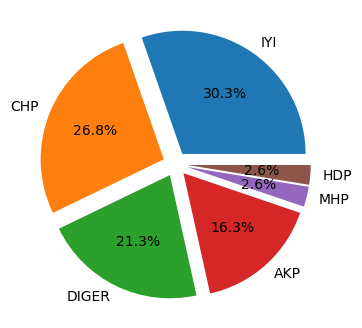

In [4]:
import matplotlib.pyplot as plt

fig, graf = plt.subplots(figsize = (12, 4))
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

graf.pie(data["parti"].value_counts(), explode = explode, labels = ["IYI", "CHP", "DIGER", "AKP", "MHP", "HDP"],
        autopct='%1.1f%%')
plt.show()

## Variable Analysis

In [5]:
def bar_plot(variable):
    var = data[variable]
    varValue = var.value_counts()
    
    plt.figure(figsize = (6,2))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel('Frequency')
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

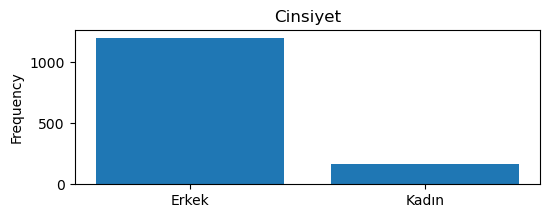

Cinsiyet: 
 Erkek    1199
Kadın     162
Name: Cinsiyet, dtype: int64


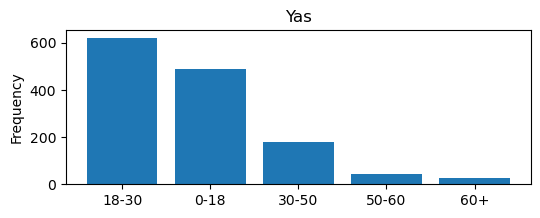

Yas: 
 18-30    622
0-18     490
30-50    178
50-60     43
60+       28
Name: Yas, dtype: int64


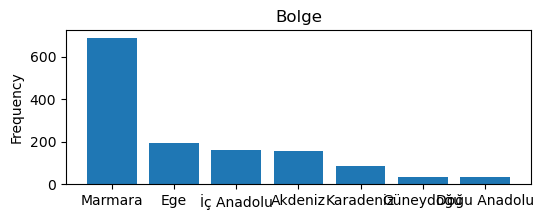

Bolge: 
 Marmara         691
Ege             194
İç Anadolu      163
Akdeniz         157
Karadeniz        88
Güneydoğu        35
Doğu Anadolu     33
Name: Bolge, dtype: int64


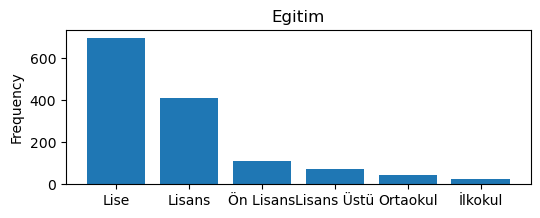

Egitim: 
 Lise           698
Lisans         410
Ön Lisans      111
Lisans Üstü     71
Ortaokul        45
İlkokul         26
Name: Egitim, dtype: int64


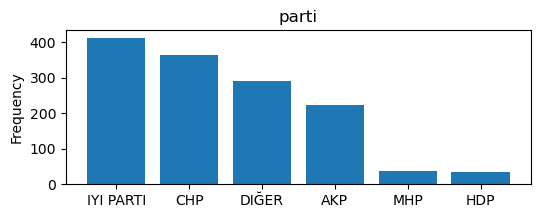

parti: 
 IYI PARTI    413
CHP          365
DIĞER        290
AKP          222
MHP           36
HDP           35
Name: parti, dtype: int64


In [6]:
categories = ['Cinsiyet','Yas','Bolge','Egitim','parti']
for c in categories:
    bar_plot(c)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: ylabel='parti'>

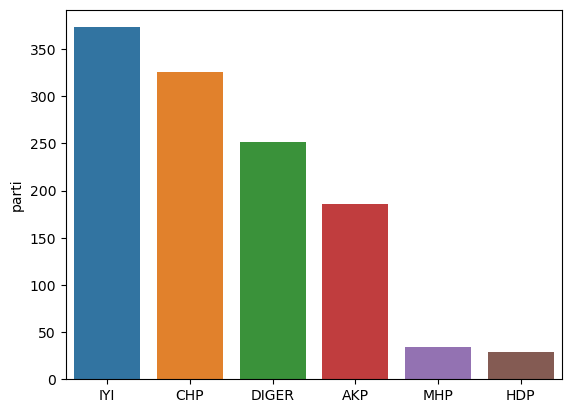

In [7]:
import seaborn as sns

erkek = data.loc[data["Cinsiyet"] == "Erkek"]
sns.barplot(x = ["IYI", "CHP", "DIGER", "AKP", "MHP", "HDP"], y = erkek["parti"].value_counts())

<Axes: ylabel='parti'>

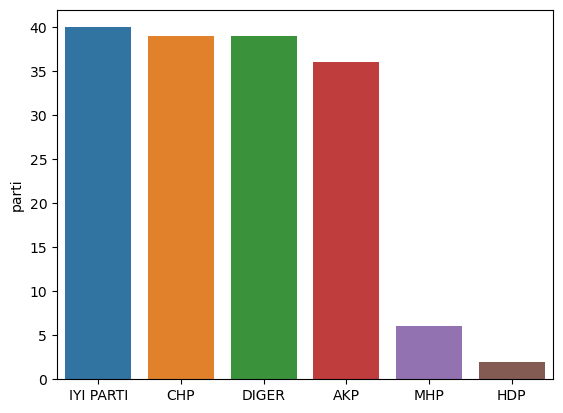

In [8]:
kadın = data.loc[data["Cinsiyet"] == "Kadın"]
sns.barplot(x = ["IYI PARTI", "CHP", "DIGER", "AKP", "MHP", "HDP"], y = kadın["parti"].value_counts())

# Analysis of political opinion

In [9]:
akp = data[data.parti=='AKP'].drop(['parti'],axis=1)
chp = data[data.parti=='CHP'].drop(['parti'],axis=1)
iyi_parti = data[data.parti=='IYI PARTI'].drop(['parti'],axis=1)
diger = data[data.parti=='DIĞER'].drop(['parti'],axis=1)
mhp = data[data.parti=='MHP'].drop(['parti'],axis=1)
hdp = data[data.parti=='HDP'].drop(['parti'],axis=1)

In [10]:
def pie_plt(column_name,datas,data_name):
    x_temp = datas[column_name].value_counts()
    labels = datas[column_name].value_counts().index
    colors = sns.color_palette('pastel')[0:5]
    fig,ax = plt.subplots(figsize=(3,3))
    g = plt.pie(x=x_temp,data=datas,labels = labels, autopct = "%1.1f%%")
    ax.set_title(data_name + " -- "+ column_name)    
    plt.show()

## AKP

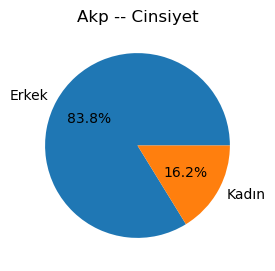

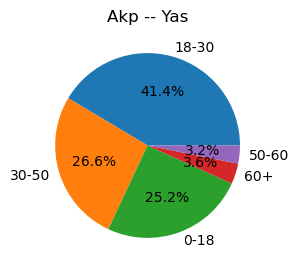

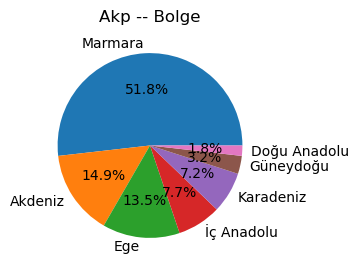

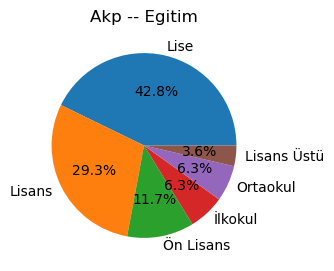

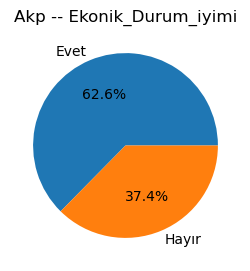

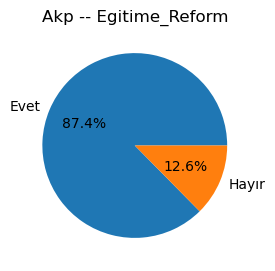

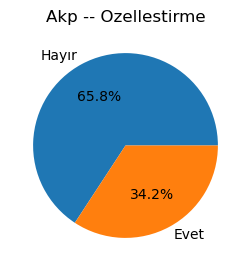

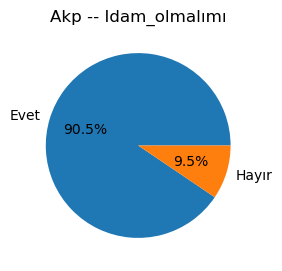

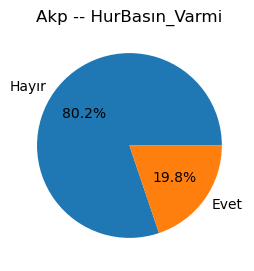

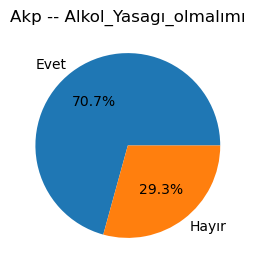

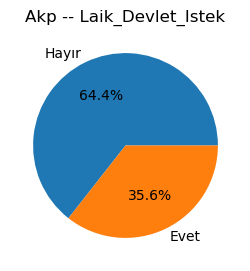

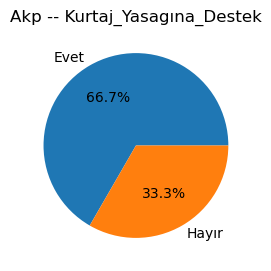

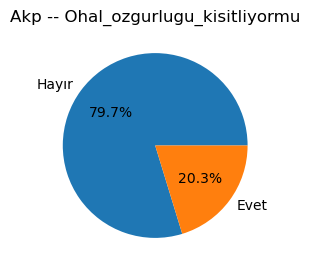

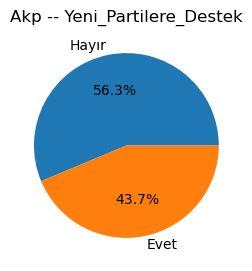

In [11]:
for i in akp.columns:
    pie_plt(i,akp,'Akp')

## CHP

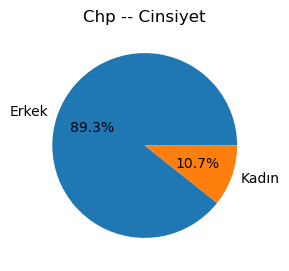

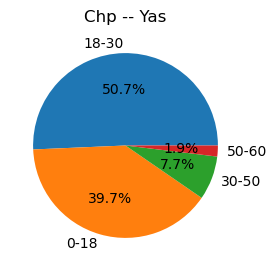

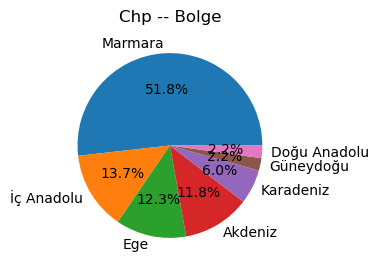

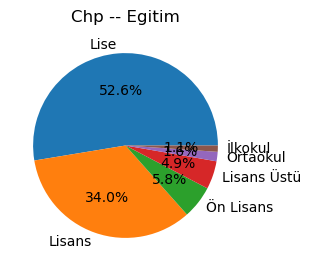

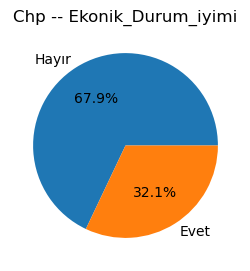

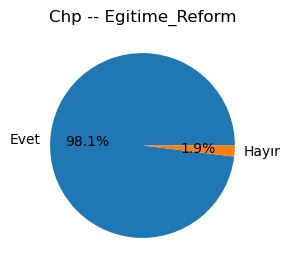

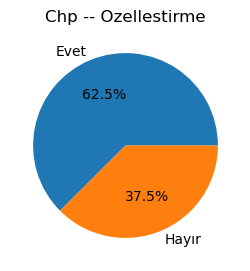

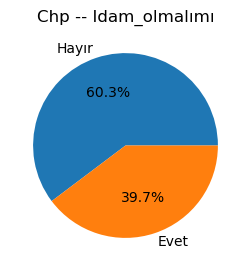

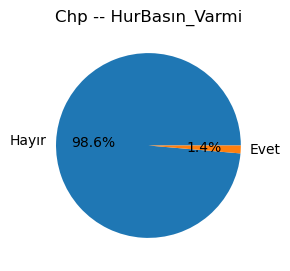

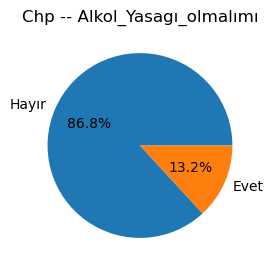

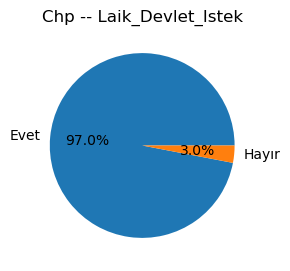

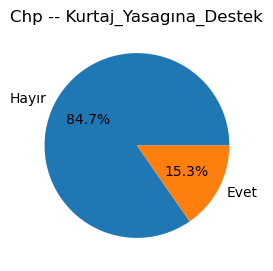

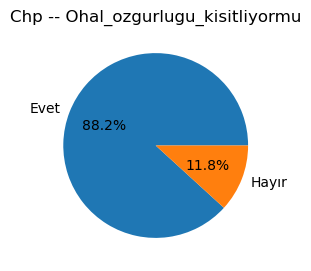

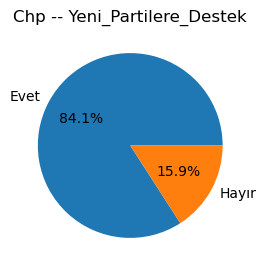

In [12]:
for i in chp.columns:
    pie_plt(i,chp,'Chp')

## IYI PARTI

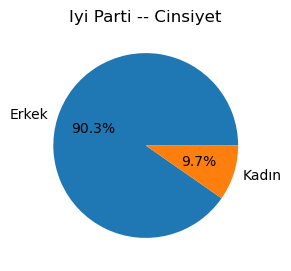

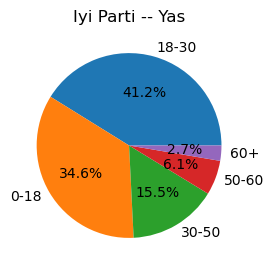

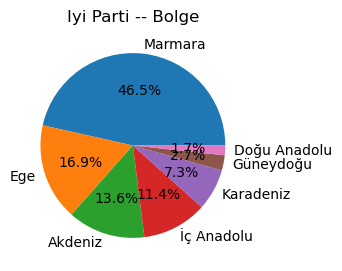

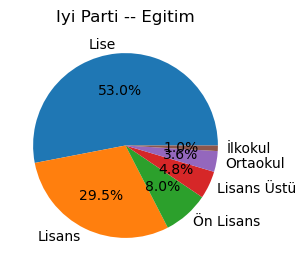

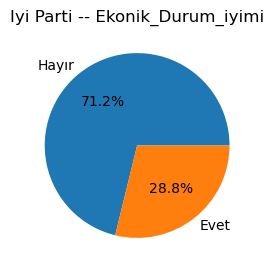

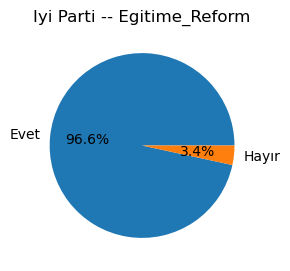

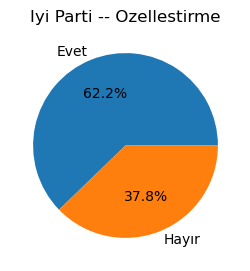

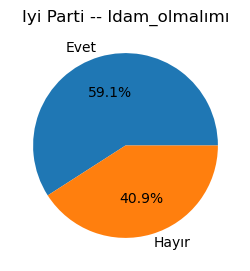

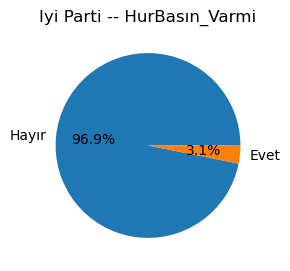

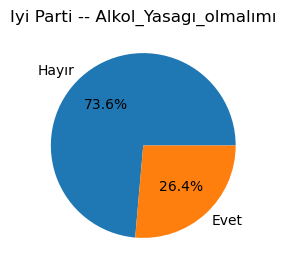

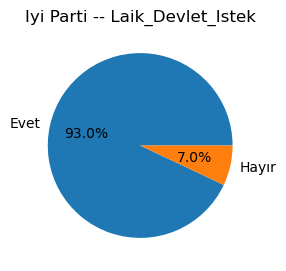

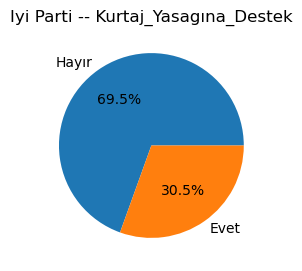

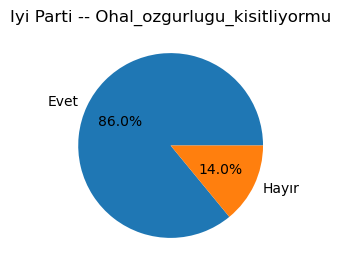

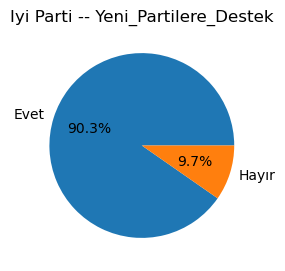

In [13]:
for i in iyi_parti.columns:
    pie_plt(i,iyi_parti,'Iyi Parti')

## MHP

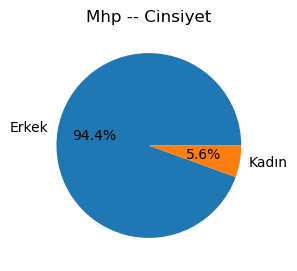

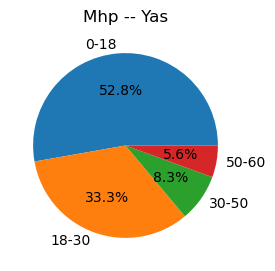

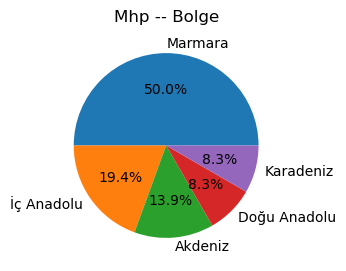

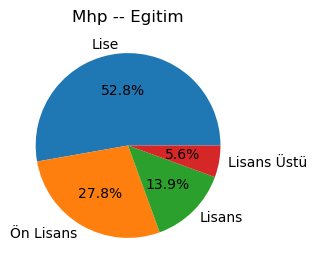

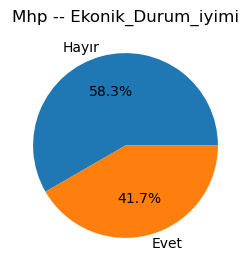

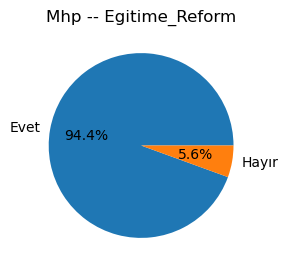

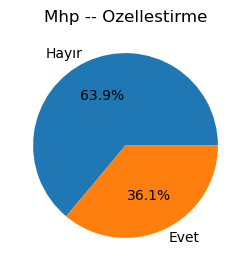

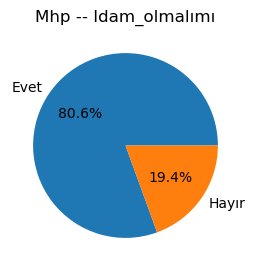

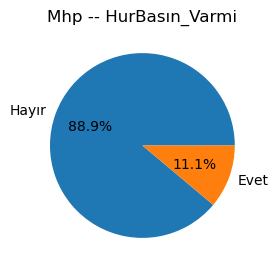

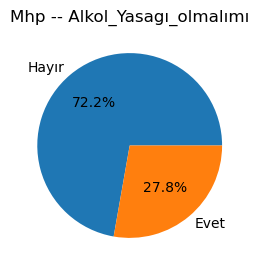

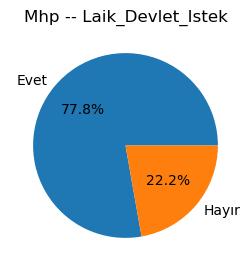

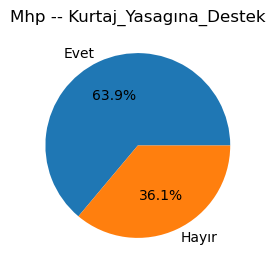

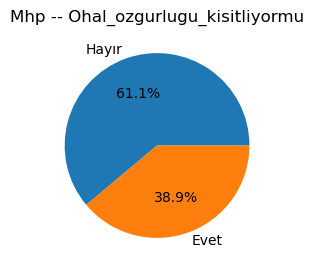

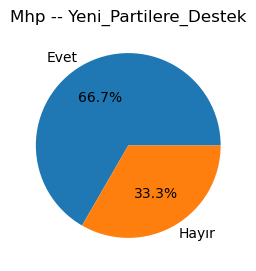

In [14]:
for i in mhp.columns:
    pie_plt(i,mhp,'Mhp')

## HDP

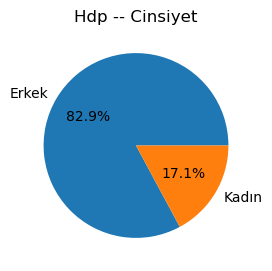

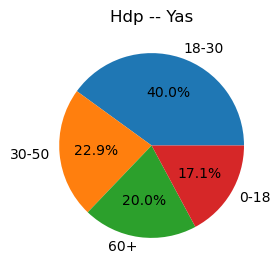

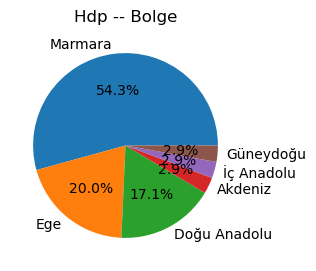

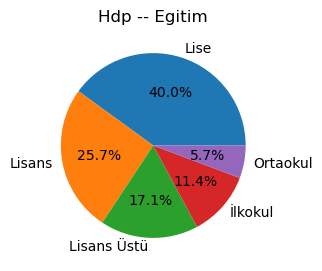

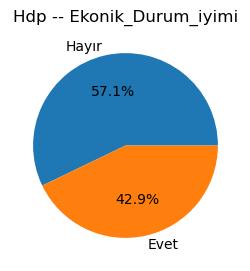

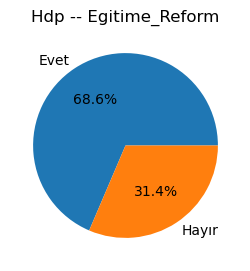

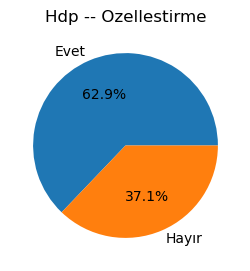

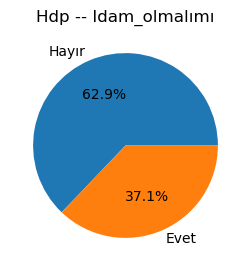

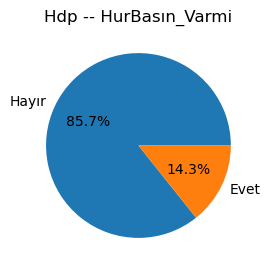

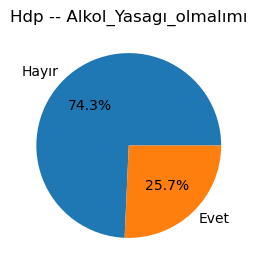

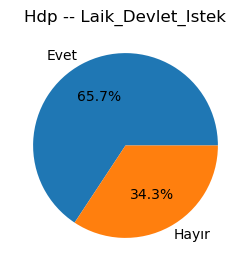

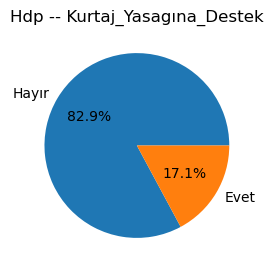

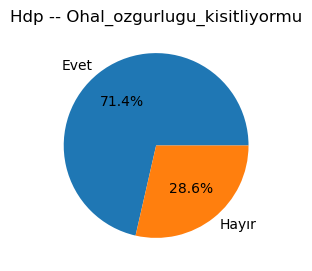

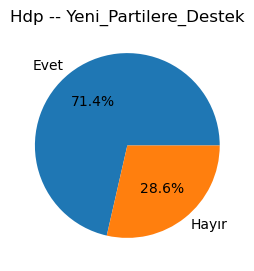

In [15]:
for i in hdp.columns:
    pie_plt(i,hdp,'Hdp')